In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

sns.set_theme(style="darkgrid")
current_palette=sns.color_palette()

### Exploratory Data Analysis

- Data is read in from file system storage
- Data is analysed by month, quarter and year from 2018 t0 2022

#### Data Preparation [cleaning and processing]
| Action                         | Description                             |
|--------------------------------|-----------------------------------------|
| Renaming columns               | ----                                    |
| Formatting data                | Ex: converting string date to date type |
| Identifying duplicated columns | ----                                    |
| Dropping irrelevant columns    | ------                                  |
| Feature selection              | -------                                 |
| Data visualisations            | ------                                  |

----------------------------------------------------------------------------------------------


In [4]:
## Read in January 2022 data from filesystem
df_flights_012022 = pd.read_csv("../../data/eda/flights/flight_data_012022/flight_data_012022.zip", low_memory=False)
df_flights_012022.shape

(563737, 120)

In [57]:
df_flights_012022.head(2)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [55]:
## Read in June 2022 data from filesystem
df_flights_062022 = pd.read_csv("../../data/eda/flights/flight_data_062022/flight_data_062022.zip", low_memory=False)
df_flights_062022.shape

(602057, 120)

In [5]:
## Read in August 2022 data from filesystem
df_flights_082022 = pd.read_csv("../../data/eda/flights/flight_data_082022/flight_data_082022.zip", low_memory=False)
df_flights_082022.shape

(613649, 120)

In [49]:
## Read in 2022 data from filesystem
df_flights = pd.read_csv("../../data/eda/flights/flight_data_2022/flight_data_2022.csv.zip", low_memory=False)
df_flights.shape

(1779443, 121)

In [56]:
df_flights.dtypes

Unnamed: 0            int64
Year                  int64
Quarter               int64
Month                 int64
DayofMonth            int64
                     ...   
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Duplicate            object
Unnamed: 119        float64
Length: 121, dtype: object

In [59]:
## clean the data by removing spaces
df_flights= df_flights.rename(columns={'Operating_Airline ' : 'Operating_Airline'})
## Format column data from [0,1] -> boolean
df_flights["Cancelled"] = df_flights["Cancelled"].astype("bool")
## Converting dataTypes
df_flights["FlightDate"] = pd.to_datetime(df_flights["FlightDate"])
df_flights["FlightDate"].head() 

0   2022-01-06
1   2022-01-06
2   2022-01-06
3   2022-01-06
4   2022-01-06
Name: FlightDate, dtype: datetime64[ns]

##### Understanding the data

In [8]:
df_flights.columns.to_list()

['Unnamed: 0',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDe

In [9]:
df_flights.dtypes

Unnamed: 0            int64
Year                  int64
Quarter               int64
Month                 int64
DayofMonth            int64
                     ...   
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Duplicate            object
Unnamed: 119        float64
Length: 121, dtype: object

In [10]:
df_flights.shape

(1779443, 121)

In [11]:
df_flights.tail()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
1779438,1779438,2022,3,8,10,3,2022-08-10,AA,AA_CODESHARE,19805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1779439,1779439,2022,3,8,16,2,2022-08-16,AA,AA_CODESHARE,19805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1779440,1779440,2022,3,8,17,3,2022-08-17,AA,AA_CODESHARE,19805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1779441,1779441,2022,3,8,18,4,2022-08-18,AA,AA_CODESHARE,19805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1779442,1779442,2022,3,8,19,5,2022-08-19,AA,AA_CODESHARE,19805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [12]:
df_flights.describe()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 119
count,1.779443e+06,1779443.0,1.779443e+06,1.779443e+06,1.779443e+06,1.779443e+06,1.779443e+06,1.779443e+06,88.000000,88.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,8.897210e+05,2022.0,2.028049e+00,5.105683e+00,1.581504e+01,3.923799e+00,1.982702e+04,2.579001e+03,20379.886364,4770.875000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.136811e+05,0.0,8.129412e-01,2.915433e+00,8.855826e+00,2.014313e+00,2.756954e+02,1.734461e+03,53.317188,984.383112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,2022.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,20304.000000,3351.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.448605e+05,2022.0,1.000000e+00,1.000000e+00,8.000000e+00,2.000000e+00,1.979000e+04,1.137000e+03,20359.500000,3847.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.897210e+05,2022.0,2.000000e+00,6.000000e+00,1.600000e+01,4.000000e+00,1.980500e+04,2.267000e+03,20378.000000,4451.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.334582e+06,2022.0,3.000000e+00,8.000000e+00,2.300000e+01,6.000000e+00,1.997700e+04,3.882000e+03,20409.750000,5764.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.779442e+06,2022.0,3.000000e+00,8.000000e+00,3.100000e+01,7.000000e+00,2.043600e+04,9.678000e+03,20500.000000,6032.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Analysis of Features
Identification of Potential Features 
- Time Series Features:
    'Year',
    'Quarter',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'FlightDate',
- Flight Info:
    - Airline: Marketing_Airline_Network
    - Origin: Origin, OriginCityName
    - Destination: Dest, DestCityName
- Departure / Delay Info:
    - CRSDepTime: Scheduled Departure
    - DepTime: Actual Departure
    - DepDelay: Departure Delay

In [13]:
df_flights.columns.to_list()

['Unnamed: 0',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDe

#### Delays by Airline in 2022

In [14]:
airline_csv = "https://raw.githubusercontent.com/jenbam/airlines/master/data-raw/airlines.csv"
airlines = pd.read_csv(airline_csv)
## save locally
#airlines.to_csv("airlines.csv") 
airlines.query("Code == '9E'")
#airlines
airline_mapper = airlines.set_index("Code")["Description"]


In [15]:
airline_counts=df_flights["Operating_Airline"].value_counts()
airline_counts.head()

WN    327327
DL    224523
AA    222706
OO    192876
UA    153764
Name: Operating_Airline, dtype: int64

In [16]:
airline_counts=df_flights["Operating_Airline"].value_counts()
airline_counts
airline_counts.index=airline_counts.index.map(
    airlines.set_index('Code')['Description']
    ).rename("Airline")
airline_counts.head()

Airline
Southwest Airlines Co.    327327
Delta Air Lines Inc.      224523
American Airlines Inc.    222706
SkyWest Airlines Inc.     192876
United Air Lines Inc.     153764
Name: Operating_Airline, dtype: int64

<AxesSubplot: ylabel='Airline'>

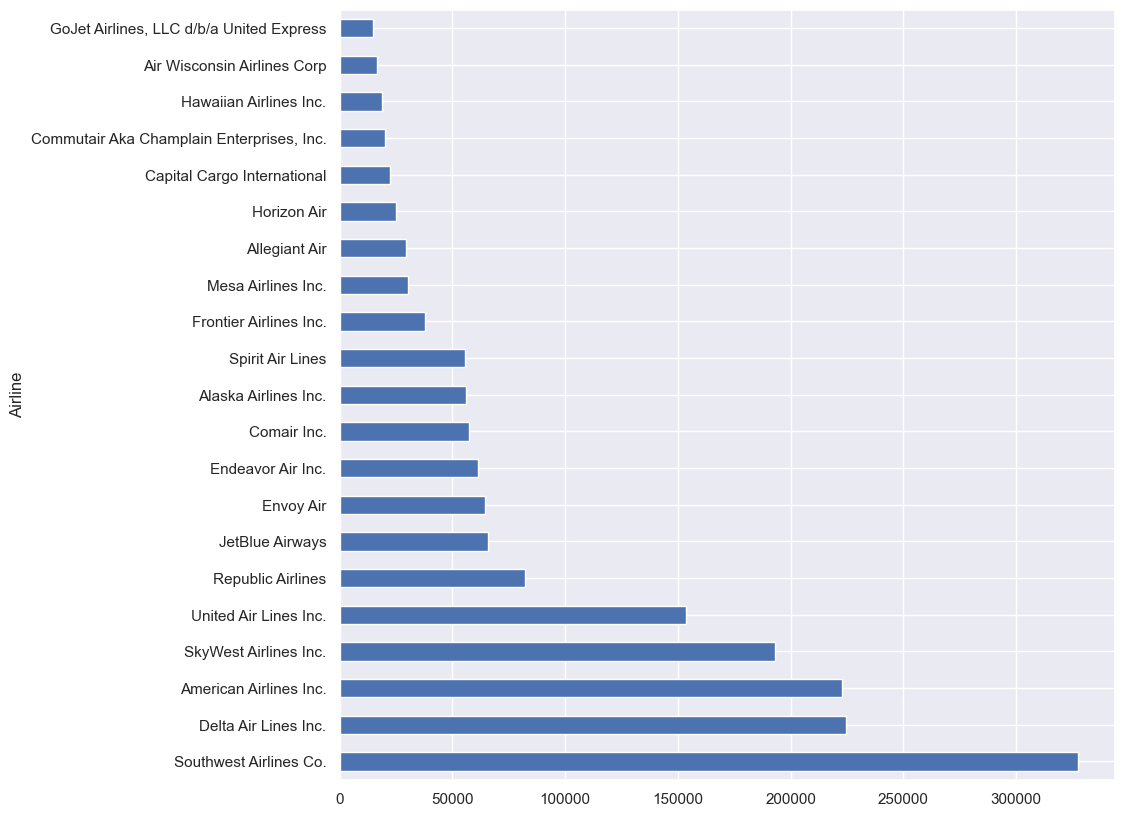

In [17]:
airline_counts.plot(kind='barh', figsize=(10,10))

<AxesSubplot: ylabel='Airline'>

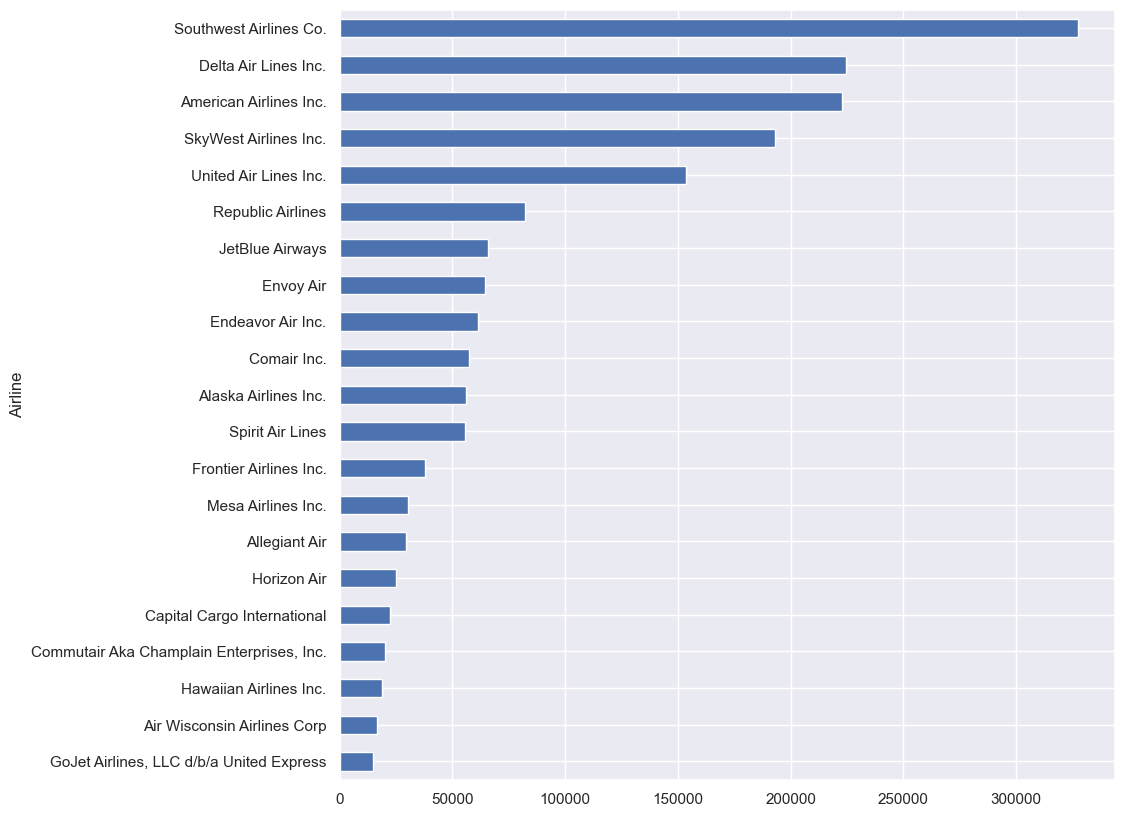

In [18]:
airline_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10,10))

In [22]:
df_flights.query('Month == 6').head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
563737,563737,2022,2,6,27,1,2022-06-27,AA,AA_CODESHARE,19805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
563738,563738,2022,2,6,28,2,2022-06-28,AA,AA_CODESHARE,19805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
563739,563739,2022,2,6,29,3,2022-06-29,AA,AA_CODESHARE,19805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
563740,563740,2022,2,6,30,4,2022-06-30,AA,AA_CODESHARE,19805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
563741,563741,2022,2,6,1,3,2022-06-01,AA,AA_CODESHARE,19805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [20]:
airline_counts.sort_values(ascending=True).to_frame("Row Count")

,Row Count
Airline,
"GoJet Airlines, LLC d/b/a United Express",14975
Air Wisconsin Airlines Corp,16794
Hawaiian Airlines Inc.,18668
"Commutair Aka Champlain Enterprises, Inc.",20265
Capital Cargo International,22426
Horizon Air,25127
Allegiant Air,29506
Mesa Airlines Inc.,30171
Frontier Airlines Inc.,37806


In [21]:
px.bar(
    airline_counts.sort_values(ascending=True), 
    orientation='h', 
    template="plotly_dark",
    title="Flights per airline",
    height=700,
    )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=Operating_Airline<br>value=%{x}<br>Airline=%{y}<extra></extra>',
              'legendgroup': 'Operating_Airline',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Operating_Airline',
              'offsetgroup': 'Operating_Airline',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 14975,  16794,  18668,  20265,  22426,  25127,  29506,  30171,  37806,
                           55690,  55980,  57212,  61431,  64375,  65755,  82066, 153764, 192876,
                          222706, 224523, 327327], dtype=int64),
              'xaxis': 'x',
              'y': array(['GoJet Airlines, LLC d/b/a United Express',
                          'Air Wisconsin Airlines Corp', 'Hawaiian Airlines Inc.',
                          'Commutair Aka Champlain Enterprises, Inc.',
                          'Capital Cargo International', 'Horizon Air', 'Allegiant Air',
                          'Mesa Airlines Inc.', 'Frontier Airlines Inc.', 'Spirit Air Lines',
                          'Alaska Airlines Inc.', 'Comair Inc.', 'Endeavor Air Inc.', 'Envoy Air',
                          'JetBlue Airways', 'Republic Airlines', 'United Air Lines Inc.',
                          'SkyWest Airlines Inc.', 'American Airlines Inc.',
                          'Delta Air Lines Inc.', 'Southwest Airlines Co.'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 700,
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Flights per airline'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Airline'}}}
})

In [23]:
pct_cancelled = df_flights["Cancelled"].mean()
print(f"{pct_cancelled:0.2f}% of flights are cancelled")
pct_cancelled

0.04% of flights are cancelled


0.03912628839473925

In [24]:
df_flights["Cancelled"].value_counts()

False    1709820
True       69623
Name: Cancelled, dtype: int64

### Cancelled flights, group by Year

In [39]:
#df_flights.query("Year==2022").query("Cancelled")
df_flights.groupby(["Month"])["Cancelled"].agg("mean").to_frame()

,Cancelled
Month,
1,0.063269
6,0.030683
8,0.025231


In [38]:
#df_flights.query("Year==2022").query("Cancelled")
df_flights.groupby(["Year"])["Cancelled"].agg("mean").to_frame()

,Cancelled
Year,
2022,0.039126


In [26]:
cancelled_flights_analysis = (
    (df_flights.query("Year == 2022")
     .groupby(["Operating_Airline", "Cancelled"])['Cancelled']
     .size()
     .unstack()
     .reset_index()
     )
    .rename(columns={False: "Departed", True: "Cancelled"})
    .rename_axis(None, axis=1))

cancelled_flights_analysis["Total"] = cancelled_flights_analysis["Departed"] + cancelled_flights_analysis["Cancelled"]
cancelled_flights_analysis["Pct_Cancelled"] = (cancelled_flights_analysis["Cancelled"] / cancelled_flights_analysis["Total"])*100
cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(airline_mapper)


In [27]:
cancelled_flights_analysis.head()     ## TODO: add geographical information of flight, weather information

,Operating_Airline,Departed,Cancelled,Total,Pct_Cancelled,Airline
0,9E,57655,3776,61431,6.146734,Endeavor Air Inc.
1,AA,211752,10954,222706,4.918592,American Airlines Inc.
2,AS,54417,1563,55980,2.792069,Alaska Airlines Inc.
3,B6,62373,3382,65755,5.143335,JetBlue Airways
4,C5,19440,825,20265,4.071058,"Commutair Aka Champlain Enterprises, Inc."


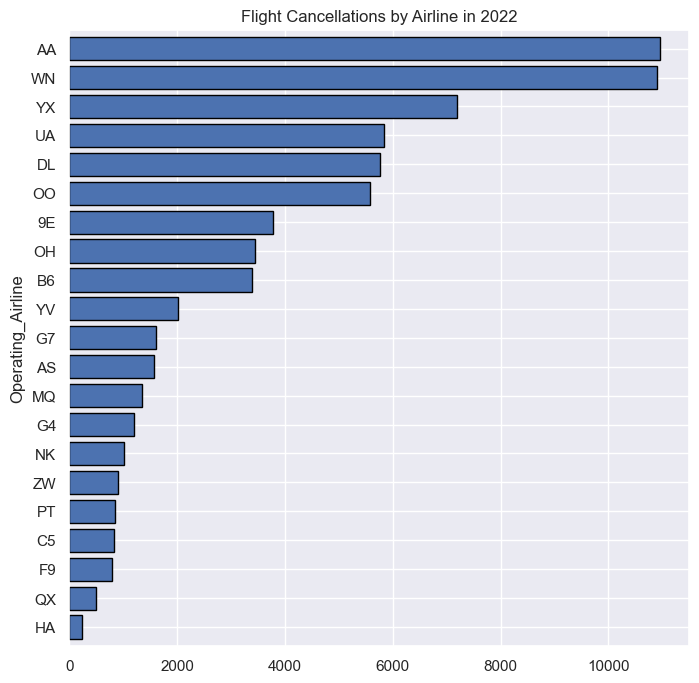

In [28]:
cancelled_flights_analysis.set_index("Operating_Airline").sort_values(
    "Cancelled")["Cancelled"].plot(kind="barh", 
                                   figsize=(8, 8), 
                                   width=.8,
                                   edgecolor="black",
                                   title="Flight Cancellations by Airline in 2022")
plt.show()

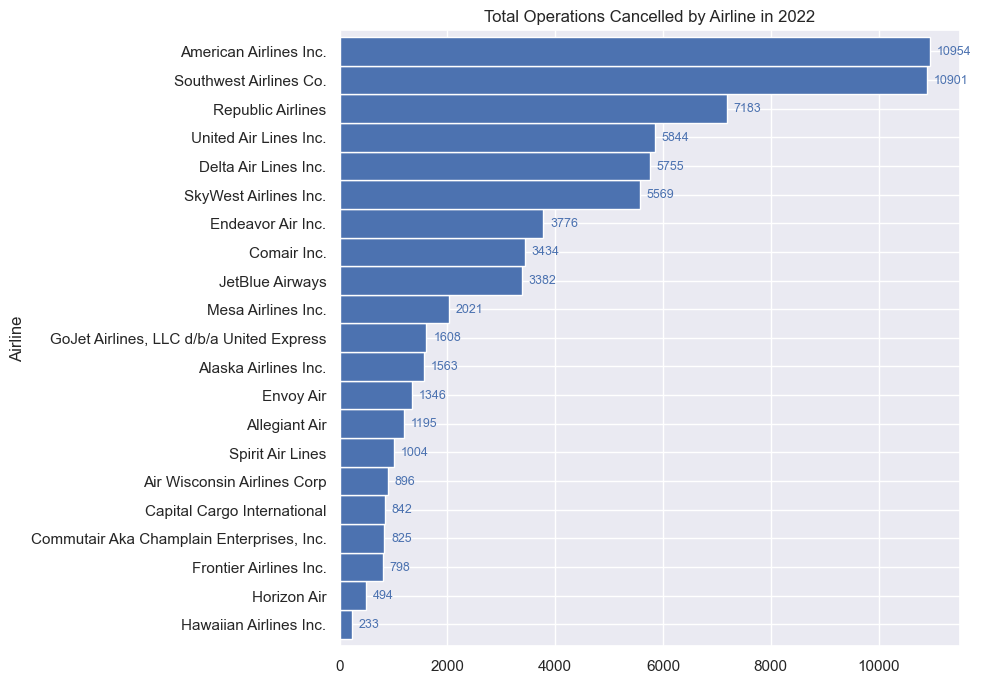

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
# cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(
#     airline_mapper)
cancelled_flights_analysis.set_index("Airline").sort_values(
    "Cancelled")["Cancelled"].plot(kind="barh", 
                                   title="Total Operations Cancelled by Airline in 2022",
                                   width=1
                                   )

ax.bar_label(ax.containers[0], padding=5, fontsize=9, color='b')
plt.show()


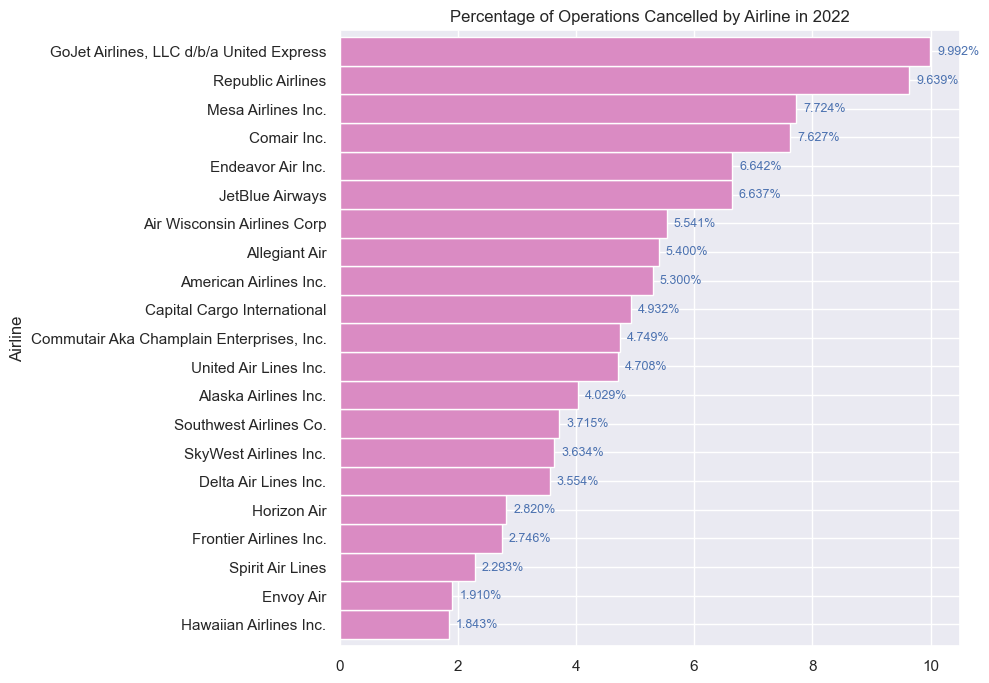

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(
    airline_mapper)
cancelled_flights_analysis.set_index("Airline").sort_values(
    "Pct_Cancelled")["Pct_Cancelled"].plot(kind="barh",
                                           title="Percentage of Operations Cancelled by Airline in 2022",
                                           width=1,
                                           #edgecolor="black",
                                           color=current_palette[6]
                                           )
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=5, fontsize=9, color='b')
plt.show()

In [41]:
cancel_count = df_flights.query("Year == 2022").query("Cancelled")["Operating_Airline"].value_counts()
cancel_count

AA    10954
WN    10901
YX     7183
UA     5844
DL     5755
OO     5569
9E     3776
OH     3434
B6     3382
YV     2021
G7     1608
AS     1563
MQ     1346
G4     1195
NK     1004
ZW      896
PT      842
C5      825
F9      798
QX      494
HA      233
Name: Operating_Airline, dtype: int64

In [42]:
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

Analysis for January - June 2022

In [43]:
df_flights["Month"].value_counts()

8    613649
6    602057
1    563737
Name: Month, dtype: int64

In [44]:
df_flights["Quarter"].value_counts()

3    613649
2    602057
1    563737
Name: Quarter, dtype: int64

In [45]:
df_flights["FlightDate"].value_counts()

2022-06-17    20841
2022-06-23    20832
2022-06-24    20800
2022-06-20    20794
2022-06-16    20789
              ...  
2022-01-01    16684
2022-01-08    16031
2022-01-29    15644
2022-01-22    15625
2022-01-15    15483
Name: FlightDate, Length: 92, dtype: int64

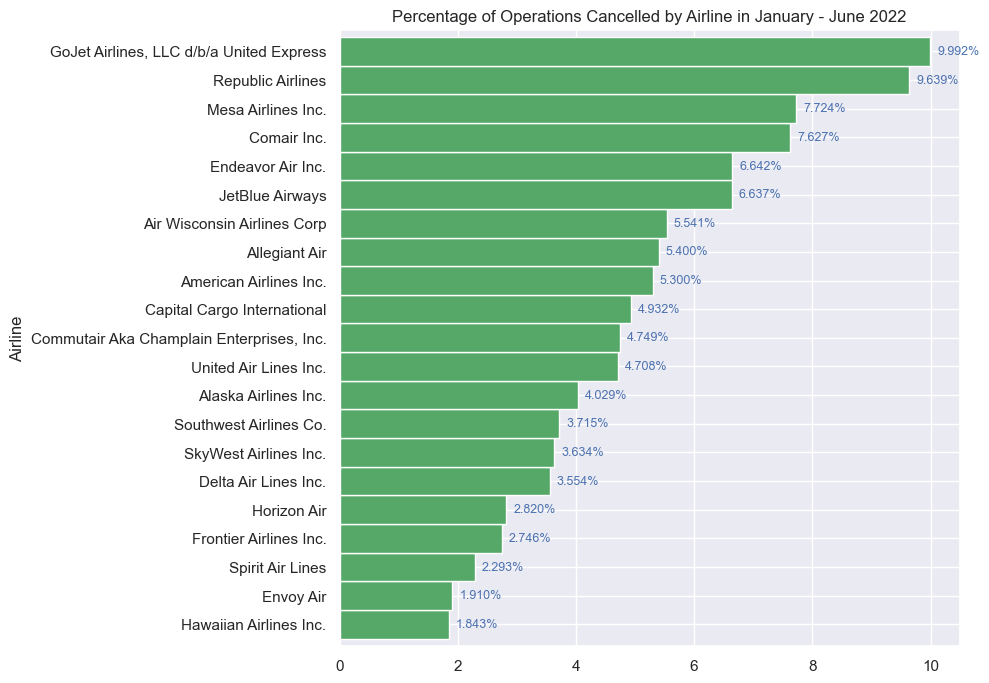

In [46]:
cancelled_flights_analysis = (
    (df_flights.query("Year == 2022 and Month <= 6")
     .groupby(["Operating_Airline", "Cancelled"])['Cancelled']
     .size()
     .unstack()
     .reset_index()
     )
    .rename(columns={False: "Departed", True: "Cancelled"})
    .rename_axis(None, axis=1))

cancelled_flights_analysis["Total"] = cancelled_flights_analysis["Departed"] + cancelled_flights_analysis["Cancelled"]
cancelled_flights_analysis["Pct_Cancelled"] = (cancelled_flights_analysis["Cancelled"] / cancelled_flights_analysis["Total"])*100
cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(airline_mapper)

fig, ax = plt.subplots(figsize=(8, 8))
cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(
    airline_mapper)
cancelled_flights_analysis.set_index("Airline").sort_values(
    "Pct_Cancelled")["Pct_Cancelled"].plot(kind="barh",
                                           title="Percentage of Operations Cancelled by Airline in January - June 2022",
                                           width=1,
                                           #edgecolor="black",
                                           color=current_palette[2]
                                           )
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=5, fontsize=9, color='b')
plt.show()